# KNN_SVM_프로모션_효율예측분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [2]:
from data_utils import *

In [3]:
mem = pd.read_csv('./data/member.csv')
tran = pd.read_csv('./data/transaction.csv')

* 쇼핑몰 고객 데이터, 프로모션 쿠폰을 발행하고 사용 여부 데이터 수집
* mem : 고객 id, 최근 방문일, 사는 지역, 추천여부, 주요접속채널, 쿠폰사용여부(target)
* tran : 고객 id, 구매수량, 총 구매금액
* 전통적 마케팅 분석 방법 **RFM 기법**을 활용해 고객 데이터에서 파생변수 생성 후 분석
* R (Recency) : 현재일 - 최근 구매일
* F (Frequency) : 구매빈도
* M (Monetary) : 구매금액
* 종속변수 : conversion → 고객이 프로모션에 반응 했는가? 1 = yes, 0 = no

In [4]:
mem.head(3)

,id,recency,zip_code,is_referral,channel,conversion
0,906145,10,Surburban,0,Phone,0
1,184478,6,Rural,1,Web,0
2,394235,7,Surburban,1,Web,0


In [5]:
raw_data = mem.copy()

In [6]:
mem.shape[0]

64000

In [7]:
tran.head(3)

,id,num_item,total_amount
0,906145,5,34000
1,906145,1,27000
2,906145,4,33000


In [8]:
tran.shape[0]

196836

🧼 [결측치 비율 확인]


📊 [숫자형 변수 이상값 리포트]

📌 id
 - Median: 550918.00
 - Max: 999997.00 / Min: 100001.00
 - Mean ± 3*Std: [-227206.83, 1328321.94]
   → ✅ 정상 범위 내
 - Z-score > 3: 0건
   → ✅ Z-score 이상 없음
 - IQR 범위: [-345576.50, 1447211.50]
 - IQR 기준 이상값: 0건
   → ✅ IQR 기준 이상 없음



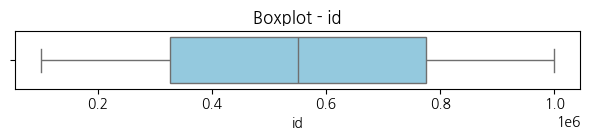

📌 num_item
 - Median: 3.00
 - Max: 6.00 / Min: 1.00
 - Mean ± 3*Std: [-1.36, 7.51]
   → ✅ 정상 범위 내
 - Z-score > 3: 0건
   → ✅ Z-score 이상 없음
 - IQR 범위: [-1.00, 7.00]
 - IQR 기준 이상값: 0건
   → ✅ IQR 기준 이상 없음



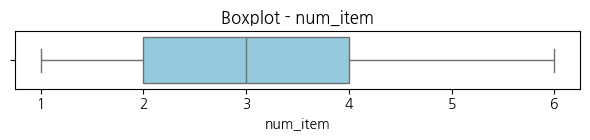

📌 total_amount
 - Median: 22000.00
 - Max: 38000.00 / Min: 8000.00
 - Mean ± 3*Std: [-2816.91, 46491.12]
   → ✅ 정상 범위 내
 - Z-score > 3: 0건
   → ✅ Z-score 이상 없음
 - IQR 범위: [-6000.00, 50000.00]
 - IQR 기준 이상값: 0건
   → ✅ IQR 기준 이상 없음



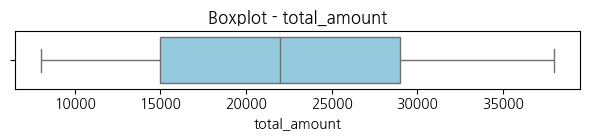


📦 [범주형 변수 희귀값 확인] (비율 < 1.0%)


In [9]:
%matplotlib inline
detailed_outlier_report(tran)

In [10]:
raw_data = pd.merge(mem, tran, on='id', how='right')
raw_data

,id,recency,zip_code,is_referral,channel,conversion,num_item,total_amount
0,906145,10,Surburban,0,Phone,0,5,34000
1,906145,10,Surburban,0,Phone,0,1,27000
2,906145,10,Surburban,0,Phone,0,4,33000
3,184478,6,Rural,1,Web,0,4,29000
4,394235,7,Surburban,1,Web,0,4,33000
...,...,...,...,...,...,...,...,...
196831,536246,9,Urban,0,Phone,1,5,24000
196832,927617,10,Surburban,0,Web,1,5,26000
196833,927617,10,Surburban,0,Web,1,3,22000
196834,927617,10,Surburban,0,Web,1,3,18000


In [11]:
from ydata_profiling import ProfileReport

C:\Users\Admin\miniforge3\envs\fintech\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Summarize dataset:   0%|      | 0/13 [00:00<?, ?it/s, Describe variable: total_amount]
Summarize dataset:  54%|▌| 7/13 [00:00<00:00, 22.60it/s, Describe variable: total_amou
Generate report structure:   0%|                                | 0/1 [00:01<?, ?it/s]


KeyboardInterrupt: 

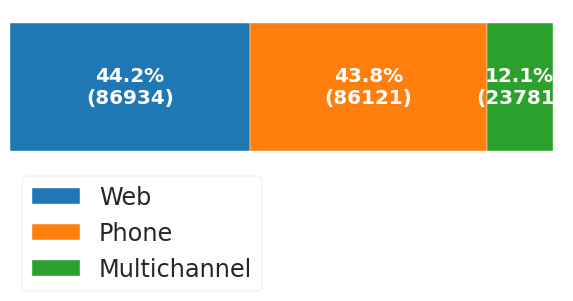

In [12]:
profile = ProfileReport(raw_data, title="Profiling Report")
profile.to_file("trans.html")

In [13]:
raw_data[raw_data.duplicated()]

,id,recency,zip_code,is_referral,channel,conversion,num_item,total_amount
225,968118,3,Surburban,1,Phone,0,2,8000
469,739518,4,Surburban,0,Multichannel,0,2,21000
518,359584,7,Surburban,0,Web,0,1,25000
567,227993,8,Surburban,0,Phone,0,1,27000
664,617485,3,Surburban,0,Web,0,3,14000
...,...,...,...,...,...,...,...,...
196449,842384,3,Surburban,0,Web,1,5,14000
196498,723688,11,Rural,1,Web,1,6,26000
196639,745367,3,Surburban,0,Web,1,4,37000
196745,830432,2,Surburban,0,Web,1,2,24000


In [14]:
raw_data[raw_data.duplicated(keep=False)].sort_values(by=list(raw_data.columns))

,id,recency,zip_code,is_referral,channel,conversion,num_item,total_amount
82003,100105,10,Rural,1,Phone,0,4,29000
82004,100105,10,Rural,1,Phone,0,4,29000
125615,100133,6,Urban,1,Web,0,3,17000
125619,100133,6,Urban,1,Web,0,3,17000
157481,100172,4,Surburban,0,Phone,0,5,15000
...,...,...,...,...,...,...,...,...
90797,997120,6,Surburban,0,Web,0,3,31000
111115,997994,1,Rural,1,Web,0,4,10000
111116,997994,1,Rural,1,Web,0,4,10000
1399,998018,12,Urban,1,Phone,0,2,30000


## Feature Engineering

In [15]:
raw_data.head(1)

,id,recency,zip_code,is_referral,channel,conversion,num_item,total_amount
0,906145,10,Surburban,0,Phone,0,5,34000


In [46]:
raw_data['conversion'].value_counts(normalize=True)*100

conversion
0    83.36788
1    16.63212
Name: proportion, dtype: float64

In [16]:
tran.groupby('id')['id'].count()

id
100001    2
100008    1
100032    3
100036    5
100070    4
         ..
999932    1
999981    4
999990    3
999995    1
999997    1
Name: id, Length: 64000, dtype: int64

In [17]:
raw_data.groupby('id')['id'].count()

id
100001    2
100008    1
100032    3
100036    5
100070    4
         ..
999932    1
999981    4
999990    3
999995    1
999997    1
Name: id, Length: 64000, dtype: int64

In [18]:
avg_total_amt = tran.groupby('id')['total_amount'].mean().round(2)
raw_data['avg_total_amt'] = raw_data['id'].map(avg_total_amt)

In [19]:
avg_total_amt[avg_total_amt.index==906145]

id
906145    31333.33
Name: total_amount, dtype: float64

In [20]:
pd.set_option('display.max_rows',100)
raw_data

,id,recency,zip_code,is_referral,channel,conversion,num_item,total_amount,avg_total_amt
0,906145,10,Surburban,0,Phone,0,5,34000,31333.33
1,906145,10,Surburban,0,Phone,0,1,27000,31333.33
2,906145,10,Surburban,0,Phone,0,4,33000,31333.33
3,184478,6,Rural,1,Web,0,4,29000,29000.00
4,394235,7,Surburban,1,Web,0,4,33000,20500.00
...,...,...,...,...,...,...,...,...,...
196831,536246,9,Urban,0,Phone,1,5,24000,28250.00
196832,927617,10,Surburban,0,Web,1,5,26000,21500.00
196833,927617,10,Surburban,0,Web,1,3,22000,21500.00
196834,927617,10,Surburban,0,Web,1,3,18000,21500.00


In [21]:
raw_data[raw_data['conversion'] == 1].loc[:,['recency']].value_counts(normalize=True)*100

recency
1          18.370090
2          14.472478
3          10.361048
10          8.971226
4           8.039587
9           7.844096
5           6.982711
6           6.848311
7           5.742562
8           4.768159
11          4.462704
12          3.137027
Name: proportion, dtype: float64

In [22]:
raw_data[raw_data['conversion'] == 1].loc[:,['zip_code']].value_counts(normalize=True)*100

zip_code 
Surburban    42.998961
Urban        37.839819
Rural        19.161219
Name: proportion, dtype: float64

In [23]:
raw_data[raw_data['conversion'] == 1].loc[:,['channel']].value_counts(normalize=True)*100

channel     
Web             47.916794
Phone           37.855092
Multichannel    14.228114
Name: proportion, dtype: float64

In [24]:
raw_data[raw_data['conversion'] == 1].loc[:,['is_referral']].value_counts(normalize=True)*100

is_referral
0              58.522207
1              41.477793
Name: proportion, dtype: float64

In [25]:
avg_num_item = tran.groupby('id')['num_item'].mean().round(2)
raw_data.insert(7, 'avg_num_item', raw_data['id'].map(avg_num_item))

In [26]:
tran_count = tran.groupby('id')['id'].count()
raw_data['tran_count'] = raw_data['id'].map(tran_count)

In [27]:
raw_data

,id,recency,zip_code,is_referral,channel,conversion,num_item,avg_num_item,total_amount,avg_total_amt,tran_count
0,906145,10,Surburban,0,Phone,0,5,3.33,34000,31333.33,3
1,906145,10,Surburban,0,Phone,0,1,3.33,27000,31333.33,3
2,906145,10,Surburban,0,Phone,0,4,3.33,33000,31333.33,3
3,184478,6,Rural,1,Web,0,4,4.00,29000,29000.00,1
4,394235,7,Surburban,1,Web,0,4,4.00,33000,20500.00,2
...,...,...,...,...,...,...,...,...,...,...,...
196831,536246,9,Urban,0,Phone,1,5,4.00,24000,28250.00,4
196832,927617,10,Surburban,0,Web,1,5,3.50,26000,21500.00,4
196833,927617,10,Surburban,0,Web,1,3,3.50,22000,21500.00,4
196834,927617,10,Surburban,0,Web,1,3,3.50,18000,21500.00,4


In [28]:
raw_data[raw_data['conversion'] == 1].loc[:,['tran_count']].value_counts(normalize=True)*100

tran_count
5             35.646649
4             27.674262
3             22.157737
2             14.521351
Name: proportion, dtype: float64

# 스케일링(scaling) 
* 거리기반의 알고리즘을 사용 시 독립변수들 간의 단위를 꼭 맞춰 주어야 함
* **MinMaxScaler** : 모든 숫자를 0~1 사이의 숫자로 변환 - 데이터 분포의 모양을 그대로 유지
* **StandardScaler** : 평균을 0, 표준편차를 1로 하는 정규분포 형태로 변환 - 데이터의 분포 모양이 정규분포로 바뀜
* **RobustScaler** : 사분위수를 이용해서 데이터를 스케일링 - 데이터에 이상값이 있을 때 사용, 이상값에 영향을 최소화

# 머신러닝 모델별 스케일러
* KNN(최근접이웃) : MinMaxScaler, 이상치가 있는 경우 RobustScaler
* SVM(서포트 벡터 머신) : StandardScaler, 이상치가 있는 경우 RobustScaler
* Logistic Regression : StandardScaler, 이상치가 있는 경우 RobustScaler
* Linear / Ridge / Lasso Regression : StandardScaler, 이상치가 있는 경우 RobustScaler
* KMeans / DBSCAN : MinMaxScaler or StandardScaler(둘 다 가능, 성능 잘 나오는 것으로!), 이상치가 있는 경우 RobustScaler
* DecisionTree / RandomForest / XGBoost : scaling 불필요, 이상치가 있는 경우에도 불필요
* Naive Bayes : scaling 불필요, 이상치가 있는 경우에도 불필요
* 인공신경망 : MinMaxScaler or StandardScaler(둘 다 가능, 성능 잘 나오는 것으로!), 이상치가 있는 경우 RobustScaler

# 스케일링 시점 : train과 test로 나눈 후에 실시

## one-hot encoding

In [29]:
data = pd.get_dummies(raw_data, drop_first=True)

In [30]:
data

,id,recency,is_referral,conversion,num_item,avg_num_item,total_amount,avg_total_amt,tran_count,zip_code_Surburban,zip_code_Urban,channel_Phone,channel_Web
0,906145,10,0,0,5,3.33,34000,31333.33,3,True,False,True,False
1,906145,10,0,0,1,3.33,27000,31333.33,3,True,False,True,False
2,906145,10,0,0,4,3.33,33000,31333.33,3,True,False,True,False
3,184478,6,1,0,4,4.00,29000,29000.00,1,False,False,False,True
4,394235,7,1,0,4,4.00,33000,20500.00,2,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196831,536246,9,0,1,5,4.00,24000,28250.00,4,False,True,True,False
196832,927617,10,0,1,5,3.50,26000,21500.00,4,True,False,False,True
196833,927617,10,0,1,3,3.50,22000,21500.00,4,True,False,False,True
196834,927617,10,0,1,3,3.50,18000,21500.00,4,True,False,False,True


## 홀드아웃

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [60]:
X = data.drop(['conversion','id'], axis=1)
y = data['conversion']

In [61]:
X_train, X_vaild, y_train, y_vaild = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y )
X_valid, X_test, y_vaild, y_test = train_test_split(X_vaild, y_vaild, test_size=0.5, random_state=42, stratify=y_vaild)

# 데이터 단위를 맞추기 위해서 scaling

In [58]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [62]:
mms = MinMaxScaler()
mms.fit(X_train)
mms_X_train = mms.transform(X_train)
mms_X_valid = mms.transform(X_valid)
mms_X_test = mms.transform(X_test)

In [65]:
mms_X_train = pd.DataFrame(mms_X_train, columns=X_train.columns)
mms_X_valid = pd.DataFrame(mms_X_valid, columns=X_valid.columns)
mms_X_test = pd.DataFrame(mms_X_test, columns=X_test.columns)

# KNN(K-Nearest Neighbor)

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
knn = KNeighborsClassifier(n_jobs=2)
knn.fit(mms_X_train, y_train)
valid_pred = knn.predict(mms_X_valid)
print(classification_report(y_vaild, valid_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92     32820
           1       0.64      0.21      0.32      6547

    accuracy                           0.85     39367
   macro avg       0.75      0.59      0.62     39367
weighted avg       0.82      0.85      0.82     39367



## KNN의 하이퍼파라미터 튜닝
* n_neighbors=? 가 가장 중요함
* 전체 샘플 수가 적을 때 10000개 이하일 때 3, 5, 7 같은 홀수값을 주로 넣음
    * ∵ 짝수이면 동률이 생길 수 있기 때문
* 전체 샘플 수가 10000개 초과 시 - 루트(n), log2(n)

## 최적 K는?

In [68]:
# 루트를 이용한 최적 K 계산
n = len(mms_X_train)
print(n)
k = int(np.sqrt(n))
print(np.sqrt(n), k)

118101
343.6582604856167 343


In [69]:
# log2(n)을 이용한 최적 K 계산
k_log2 = int(np.log2(n))
print(k_log2)

16


In [70]:
knn = KNeighborsClassifier(n_jobs=2, n_neighbors=343)
knn.fit(mms_X_train, y_train)
valid_pred = knn.predict(mms_X_valid)
print(classification_report(y_vaild, valid_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91     32820
           1       1.00      0.00      0.00      6547

    accuracy                           0.83     39367
   macro avg       0.92      0.50      0.46     39367
weighted avg       0.86      0.83      0.76     39367



In [73]:
knn = KNeighborsClassifier(n_jobs=2, n_neighbors=15)
knn.fit(mms_X_train, y_train)
valid_pred = knn.predict(mms_X_valid)
print(classification_report(y_vaild, valid_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     32820
           1       0.87      0.12      0.22      6547

    accuracy                           0.85     39367
   macro avg       0.86      0.56      0.57     39367
weighted avg       0.85      0.85      0.80     39367



## 데이터 증폭을 통한 성능 개선

In [75]:
mms_X_train.columns

Index(['recency', 'is_referral', 'num_item', 'avg_num_item', 'total_amount',
       'avg_total_amt', 'tran_count', 'zip_code_Surburban', 'zip_code_Urban',
       'channel_Phone', 'channel_Web'],
      dtype='object')

In [74]:
from imblearn.over_sampling import SMOTENC

In [76]:
smtnc = SMOTENC(categorical_features=[1,7,8,9,10], random_state=42)
smt_X_train, smt_y_train = smtnc.fit_resample(mms_X_train, y_train)

C:\Users\Admin\miniforge3\envs\fintech\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
C:\Users\Admin\miniforge3\envs\fintech\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [78]:
# log2(n)을 이용한 최적 K 계산
k_log2_2 = int(np.log2(len(smt_X_train)))
print(k_log2_2)

17


In [79]:
knn = KNeighborsClassifier(n_jobs=2, n_neighbors=17)
knn.fit(smt_X_train, smt_y_train)
valid_pred = knn.predict(mms_X_valid)
print(classification_report(y_vaild, valid_pred))
test_pred = knn.predict(X_test)
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.90      0.71      0.79     32820
           1       0.29      0.61      0.40      6547

    accuracy                           0.69     39367
   macro avg       0.60      0.66      0.59     39367
weighted avg       0.80      0.69      0.73     39367

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     32820
           1       0.17      1.00      0.29      6548

    accuracy                           0.17     39368
   macro avg       0.08      0.50      0.14     39368
weighted avg       0.03      0.17      0.05     39368



C:\Users\Admin\miniforge3\envs\fintech\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\miniforge3\envs\fintech\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\miniforge3\envs\fintech\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

# 서포트 벡터 SVC를 사용해서 분석
* StandardScaler
* 카테고리 변수를 제외하고 StandardScaler를 사용하는 것이 좋음

In [80]:
X_train.columns

Index(['recency', 'is_referral', 'num_item', 'avg_num_item', 'total_amount',
       'avg_total_amt', 'tran_count', 'zip_code_Surburban', 'zip_code_Urban',
       'channel_Phone', 'channel_Web'],
      dtype='object')

In [83]:
X_train_cat = X_train.loc[:,['is_referral', 'zip_code_Surburban', 'zip_code_Urban', 'channel_Phone', 'channel_Web']]
X_train_num = X_train.drop(['is_referral', 'zip_code_Surburban', 'zip_code_Urban', 'channel_Phone', 'channel_Web'], axis=1)

In [85]:
num_cols = X_train_num.columns

In [86]:
ss = StandardScaler()
ss.fit(X_train_num)
X_train_num_temp = ss.transform(X_train_num)
X_valid_temp = ss.transform(X_valid[num_cols])
X_test_temp = ss.transform(X_test[num_cols])

In [89]:
ss_X_train_num = pd.DataFrame(X_train_num_temp, columns=num_cols, index=X_train_num.index)
ss_X_valid_num = pd.DataFrame(X_valid_temp, columns=num_cols, index=X_valid.index)
ss_X_test_num = pd.DataFrame(X_test_temp, columns=num_cols, index=X_test.index)

In [90]:
ss_X_test_num

,recency,num_item,avg_num_item,total_amount,avg_total_amt,tran_count
68346,0.642433,0.623431,-0.092804,-0.953100,-0.563991,1.067730
66234,0.927371,0.623431,0.142016,0.020391,-0.734520,1.067730
153390,0.072556,-0.052550,0.142016,0.872195,0.544443,1.067730
34778,0.927371,-0.728530,-2.053544,1.480627,0.246019,-0.574154
190699,1.212310,1.975391,1.081292,1.358941,0.885500,-0.574154
...,...,...,...,...,...,...
82841,0.357494,-0.728530,0.200720,-0.953100,-1.938876,0.246788
149201,0.927371,-1.404510,0.376835,1.480627,0.160754,1.067730
53641,-1.352136,1.299411,1.081292,0.020391,0.246019,0.246788
163646,-1.067197,-0.052550,-0.562442,0.263763,1.056028,1.067730


In [92]:
cat_cols = X_train_cat.columns

In [95]:
ss_X_train = pd.concat([ss_X_train_num, X_train_cat], axis=1)

In [97]:
ss_X_valid = pd.concat([ss_X_valid_num, X_valid[cat_cols]], axis=1)
ss_X_test = pd.concat([ss_X_test_num, X_test[cat_cols]], axis=1)

In [55]:
from sklearn.svm import SVC

In [98]:
svc = SVC()
svc.fit(ss_X_train, y_train)
valid_pred = svc.predict(ss_X_valid)
print(classification_report(y_vaild, valid_pred))
test_pred = svc.predict(ss_X_test)
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93     32820
           1       0.95      0.24      0.38      6547

    accuracy                           0.87     39367
   macro avg       0.91      0.62      0.65     39367
weighted avg       0.88      0.87      0.84     39367

              precision    recall  f1-score   support

           0       0.87      1.00      0.93     32820
           1       0.95      0.24      0.39      6548

    accuracy                           0.87     39368
   macro avg       0.91      0.62      0.66     39368
weighted avg       0.88      0.87      0.84     39368

